[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/upm-classes/aapi_2023/blob/main/practica1/practica_1.ipynb)

## Práctica 1: Procesamiento de Imágenes en Python

**Objetivo:** Realizar diversas operaciones de procesamiento de imágenes utilizando Python y comparar los resultados obtenidos.

In [1]:
# Librerias a importar

import cv2
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

**Tarea 1:** Abrir imágenes en RGB y mostrarlas

In [2]:
filename_1 = './images/image_G.jpg' # TODO: establece el nombre de las imágenes de acuerdo a las indicaciones dadas
filename_2 = './images/image_base.jpg'

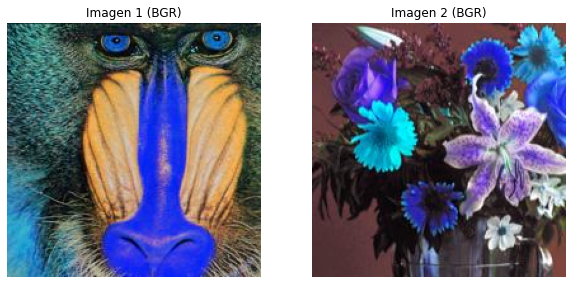

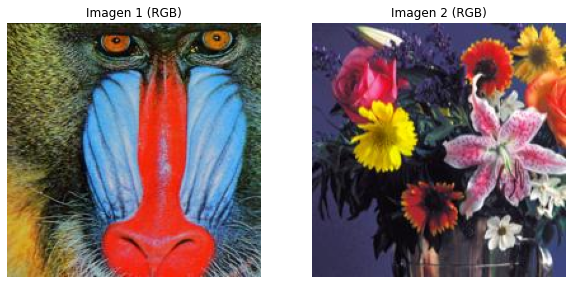

In [3]:
# Cargar imágenes
image_1 = cv2.imread(filename_1, cv2.IMREAD_COLOR)
image_2 = cv2.imread(filename_2, cv2.IMREAD_COLOR)

plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(image_1), plt.title('Imagen 1 (BGR)')
plt.axis('off')
plt.subplot(122), plt.imshow(image_2), plt.title('Imagen 2 (BGR)')
plt.axis('off')
plt.show()

# Images are opened in a BGR format, we need to change 
# it to RGB

image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

# Mostrar las imágenes
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(image_1), plt.title('Imagen 1 (RGB)')
plt.axis('off')
plt.subplot(122), plt.imshow(image_2), plt.title('Imagen 2 (RGB)')
plt.axis('off')
plt.show()

Completa la siguiente funcion para que dada una imagen RGB (np.array) la separe en sus 3 componentes.

In [4]:
def split_rgb(image:np.array) -> Tuple[np.array, np.array, np.array]:
    # YOUR CODE HERE
    # b,g,r = cv2.split(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    r, g, b = cv2.split(image)
    return (r, g, b)
    # raise NotImplementedError()

In [5]:
r, g, b = split_rgb(image_1)

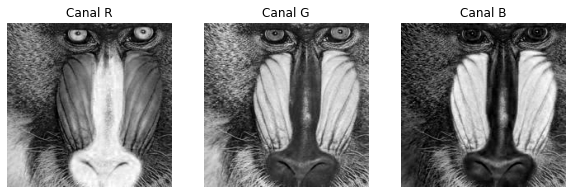

In [6]:
plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(r, cmap='gray'), plt.title('Canal R')
plt.axis('off')
plt.subplot(132), plt.imshow(g, cmap='gray'), plt.title('Canal G')
plt.axis('off')
plt.subplot(133), plt.imshow(b, cmap='gray'), plt.title('Canal B')
plt.axis('off')
plt.show()

**Tarea 2:** Cálculo de valores estadísticos.

In [7]:
def image_statistics(image: np.array) -> Tuple[float, float, float]:
    """
    Dada una imagen en escala de grises de 8 bits, debe devolver 
    una tupla con los valores máximos, mínimos y promedio de los 
    píxeles.
    """
    # YOUR CODE HERE
    maximo = np.max(image)
    minimo = np.min(image)
    promedio = np.mean(image)
    return (maximo, minimo, promedio)
    # raise NotImplementedError()

In [8]:
max, min, avg = image_statistics(b)

print(f'maximum value: {max}')
print(f'minimum value: {min}')
print(f'average value: {avg}')

maximum value: 255
minimum value: 0
average value: 91.0792


In [12]:
variance_r = np.var(r)
variance_g = np.var(g)
variance_b = np.var(b)
print(variance_r, variance_g, variance_b)

4431.9707626493755 2457.29645976 5088.05432736


**Tarea 3:** Realizar operaciones aritméticas y lógicas.

Se debe tener cuidado con los tipos de datos al trabajar con las imágenes. Por tanto, se deben realizar operaciones de cambio de tipos (*casting*) y mantener los valores dentro del rango permitido (*clipping*).

In [13]:
a = np.array([100], dtype=np.uint8)
b = np.array([255], dtype=np.uint8)

print(f'Suma: {a + b}')
print(f'Resta: {a - b}')

a = np.array([100], dtype=np.float32)
b = np.array([255], dtype=np.float32)

print(f'Suma: {a + b}')
print(f'Resta: {a - b}')

Suma: [99]
Resta: [101]
Suma: [355.]
Resta: [-155.]


In [14]:
def add_images(a:np.array, b:np.array) -> np.array:
    """
    Función que suma dos canales (a+b) y devuelve el 
    resultado en un np.array de tipo np.uint8.
    """
    # YOUR CODE HERE
    c = a + b
    c[c > 255] = 255
    return c.astype(np.uint8)
    # raise NotImplementedError()

In [15]:
def substract_images(a:np.array, b:np.array) -> np.array:
    """
    Función que resta dos canales (a-b) y devuelve el 
    resultado en un np.array de tipo np.uint8.
    """
    # YOUR CODE HERE
    c = a - b
    c[c < 0] = 0
    return c.astype(np.uint8)
    # raise NotImplementedError()

In [16]:
def logic_and_images(a:np.array, b:np.array) -> np.array:
    """
    Función que realiza la operación lógica AND entre dos
    canales (a AND b) y devuelve el 
    resultado en un np.array de tipo np.uint8. Los canales
    deben binarizarse.
    """
    # YOUR CODE HERE
    mitad = int(255/2) # establecemos un umbral
    
    a_bin = np.where(a <= mitad, 0, 1) # binarizamos a
    b_bin = np.where(b <= mitad, 0, 1) # binarizamos b
    
    c = np.logical_and(a_bin, b_bin)
    result = c.astype(np.uint8) * 255
    return result
    # raise NotImplementedError()

In [17]:
def logic_or_images(a:np.array, b:np.array) -> np.array:
    """
    Función que realiza la operación lógica OR entre dos
    canales (a OR b) y devuelve el 
    resultado en un np.array de tipo np.uint8. Los canales
    deben binarizarse.
    """
    # YOUR CODE HERE
    mitad = int(255/2) # establecemos un umbral
    
    a_bin = np.where(a <= mitad, 0, 1) # binarizamos a
    b_bin = np.where(b <= mitad, 0, 1) # binarizamos b
    
    c = np.logical_or(a_bin, b_bin)
    result = c.astype(np.uint8) * 255
    return result
    # raise NotImplementedError()

In [18]:
r_1, g_1, b_1 = split_rgb(image_1)
r_2, g_2, b_2 = split_rgb(image_2)

addition = add_images(r_1, r_2)
substraction = substract_images(r_1, r_2)
logic_and = logic_and_images(r_1, r_2)
logic_or = logic_or_images(r_1, r_2)

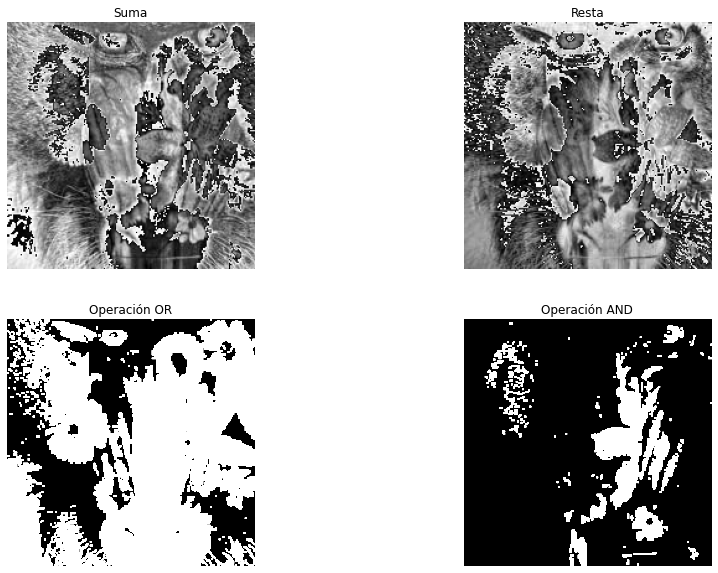

In [19]:
plt.figure(figsize=(15, 10))
plt.subplot(221), plt.imshow(addition, cmap='gray', vmax=255, vmin=0), plt.title('Suma')
plt.axis('off')
plt.subplot(222), plt.imshow(substraction, cmap='gray', vmax=255, vmin=0), plt.title('Resta')
plt.axis('off')
plt.subplot(223), plt.imshow(logic_or, cmap='gray', vmax=1, vmin=0), plt.title('Operación OR')
plt.axis('off')
plt.subplot(224), plt.imshow(logic_and, cmap='gray', vmax=1, vmin=0), plt.title('Operación AND')
plt.axis('off')
plt.show()

In [20]:
np.count_nonzero(logic_and == 255)

4356

**Tarea 4:** Cálculo del histograma

In [21]:
def calculate_histogram(image: np.array, bins: int = 255) -> Tuple[np.array, np.array]:
    """
    Dada una imagen en escala de grises de 8 bits, 
    esta función debe devolver dos matrices numpy: 
    la primera será una matriz numpy con el histograma y 
    la segunda contendrá los bordes de los bins de acuerdo 
    con el número de bins seleccionados. 
    Deberías utilizar una función de numpy para calcular el 
    histograma.
    """
    # YOUR CODE HERE
    hist, bin_edges = np.histogram(image, bins=bins)
    return (hist, bin_edges)
    # raise NotImplementedError()

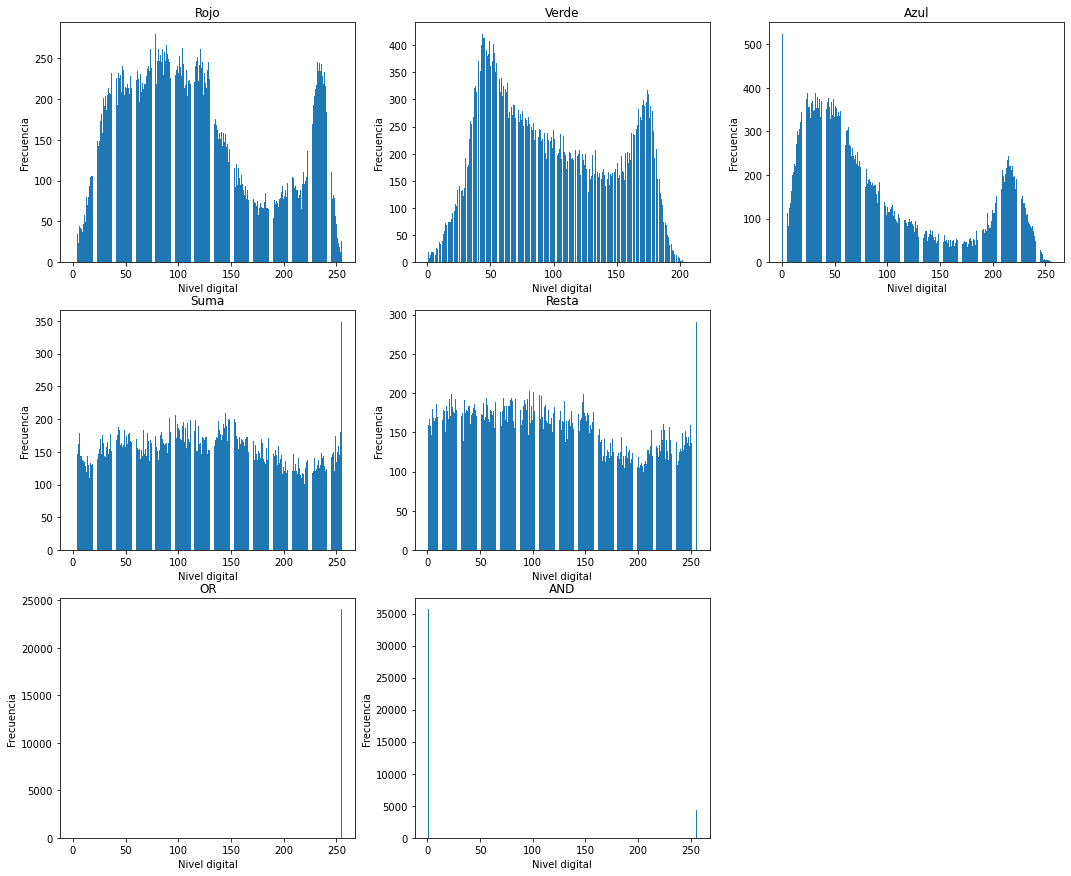

In [22]:
r_hist, r_edges = calculate_histogram(r_1)
g_hist, g_edges = calculate_histogram(g_1)
b_hist, b_edges = calculate_histogram(b_1)
addition_hist, addition_edges = calculate_histogram(addition)
substraction_hist, substraction_edges = calculate_histogram(substraction)
logic_or_hist, logic_or_edges = calculate_histogram(logic_or)
logic_and_hist, logic_and_edges = calculate_histogram(logic_and)

plt.figure(figsize=(18, 15))
plt.subplot(331), plt.bar(r_edges[1:], r_hist), plt.title('Rojo')
plt.xlabel('Nivel digital')
plt.ylabel('Frecuencia')
plt.subplot(332), plt.bar(g_edges[1:], g_hist), plt.title('Verde')
plt.xlabel('Nivel digital')
plt.ylabel('Frecuencia')
plt.subplot(333), plt.bar(b_edges[1:], b_hist), plt.title('Azul')
plt.xlabel('Nivel digital')
plt.ylabel('Frecuencia')
plt.subplot(334), plt.bar(addition_edges[1:], addition_hist), plt.title('Suma')
plt.xlabel('Nivel digital')
plt.ylabel('Frecuencia')
plt.subplot(335), plt.bar(substraction_edges[1:], substraction_hist), plt.title('Resta')
plt.xlabel('Nivel digital')
plt.ylabel('Frecuencia')
plt.subplot(337), plt.bar(logic_or_edges[1:], logic_or_hist), plt.title('OR')
plt.xlabel('Nivel digital')
plt.ylabel('Frecuencia')
plt.subplot(338), plt.bar(logic_and_edges[1:], logic_and_hist), plt.title('AND')
plt.xlabel('Nivel digital')
plt.ylabel('Frecuencia')
plt.show()

**Tarea 5:** Filtrado en el dominio espacial

In [23]:
def spatial_convolution(image:np.array, kernel:np.array) -> np.array:
    """ 
    Función que calcula la convolución espacial.
    """
    
    assert image.ndim == 2
    assert kernel.ndim == 2

    # Convierte la imagen y el kernel en np.float32
    image = image.astype(np.float32)
    kernel = kernel.astype(np.float32)

    # Obtiene las dimensiones de la imagen y el kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # Calcula el tamaño del borde para manejar la convolución
    border_height = kernel_height // 2
    border_width = kernel_width // 2
    
    # Crea una matriz para almacenar la imagen resultante de la convolución
    convolved_image = np.zeros_like(image)

    # Realiza la convolución espacial
    for i in range(border_height, image_height - border_height):
        for j in range(border_width, image_width - border_width):
            # Extrae la región de la imagen que se está convolucionando
            region = image[i - border_height:i + border_height + 1, j - border_width:j + border_width + 1]
            # Realiza la operación de convolución
            convolved_value = np.sum(region * kernel)
            # Asigna el valor resultante a la posición correspondiente en la imagen resultante
            convolved_image[i, j] = convolved_value

    return convolved_image

In [24]:
def smooth_filter(size:int)->np.array:
    """
    Esta función debe permitir definir el kernel 
    de tamaño 3 o 5 definido en las transparencias
    para suavizar la imagen
    """
    # YOUR CODE HERE
    result = None
    if size == 3 or size == 5:
        result = np.ones((size, size))
    return result
    # raise NotImplementedError()

In [25]:
def edge_filter(size)->np.array:
    """
    Esta función debe permitir definir el kernel 
    de tamaño 3 o 5 definido en las transparencias 
    para resaltar bordes
    """
    # YOUR CODE HERE
    if size == 3:
        result = np.ones((size, size)) * -1
        centro = size // 2
        result[centro, centro] = 9
    elif size == 5:
        result = np.ones((size, size)) * -1
        centro = size // 2
        result[centro, centro] = 24
    else:
        result = None
    return result
    # raise NotImplementedError()

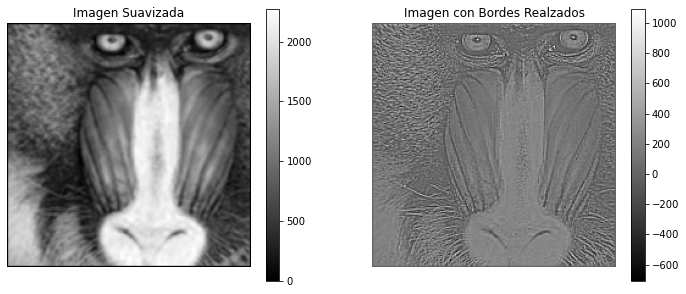

In [52]:
image_smooth = spatial_convolution(r, smooth_filter(3))
image_edges = spatial_convolution(r, edge_filter(3))

plt.figure(figsize=(12, 5))
plt.subplot(121), plt.imshow(image_smooth, cmap='gray'), plt.title('Imagen Suavizada')
plt.colorbar()
plt.axis('off')
plt.subplot(122), plt.imshow(image_edges, cmap='gray'), plt.title('Imagen con Bordes Realzados')
plt.colorbar()
plt.axis('off')
plt.show()

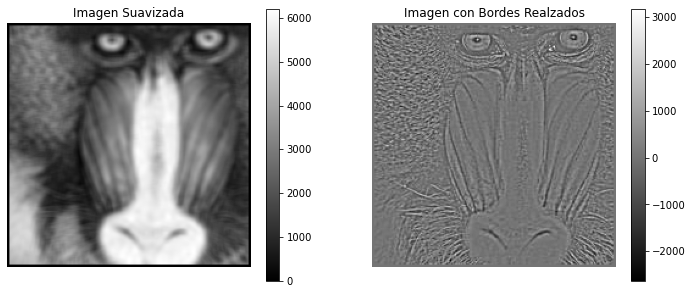

In [53]:
image_smooth = spatial_convolution(r, smooth_filter(5))
image_edges = spatial_convolution(r, edge_filter(5))

plt.figure(figsize=(12, 5))
plt.subplot(121), plt.imshow(image_smooth, cmap='gray'), plt.title('Imagen Suavizada')
plt.colorbar()
plt.axis('off')
plt.subplot(122), plt.imshow(image_edges, cmap='gray'), plt.title('Imagen con Bordes Realzados')
plt.colorbar()
plt.axis('off')
plt.show()

**Tarea 6:** Transformada de Fourier

El módulo de la transformada de Fourier se define como:

$$
|F(u)| = \left| \int_{-\infty}^{\infty} f(x) e^{-i2\pi ux} \, dx \right|
$$

In [26]:
def power_spectrum(image:np.array) -> np.array:
    """
    Función que calcula el módulo de la transformada 
    de Fourier de una imagen. Se pueden utilizar las funciones 
    definidas en numpy. 
    Proceso: 
        (1) Aplicar la Transformada de Fourier. 
        (2) Desplazar el cero al centro.
        (3) Calcular el espectro de potencia (módulo)
    """
    # YOUR CODE HERE
    fourier = np.fft.fft2(image)  # cálculo de la transformada de fourier
    fourier_shifted = np.fft.fftshift(fourier)  # Centrar el espectro
    modulo = np.abs(fourier_shifted)
    return modulo
    # raise NotImplementedError()

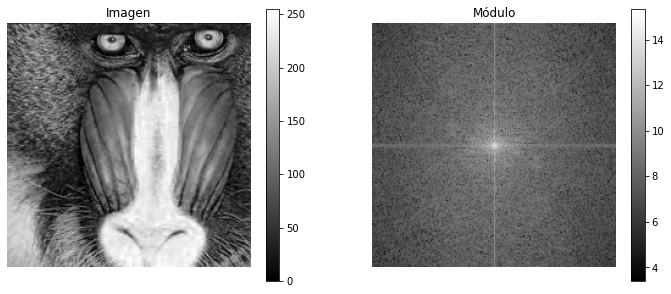

In [27]:
spectrum = power_spectrum(r_1)

plt.figure(figsize=(12, 5))
plt.subplot(121), plt.imshow(r_1, cmap='gray'), plt.title('Imagen')
plt.colorbar()
plt.axis('off')
plt.subplot(122), plt.imshow(np.log(1 + spectrum), cmap='gray'), plt.title('Módulo')
plt.colorbar()
plt.axis('off')
plt.show()

**Tarea 7:** Filtrado en el dominio de Fourier.

In [28]:
def filter_fourier(image, kernel):
    # Calcular la Transformada de Fourier de la imagen
    fourier = np.fft.fft2(image)
    fourier_shifted = np.fft.fftshift(fourier)  # Centrar el espectro
    # Aplica el filtro en el dominio de la frecuencia
    fourier_filtering = fourier_shifted * kernel
    # Calcular la Transformada de Fourier inversa para obtener la imagen filtrada
    filtered_image = np.abs(np.fft.ifft2(np.fft.ifftshift(fourier_filtering)))
    return filtered_image

In [29]:
def low_pass_filter(image, kernel_size):
    """ Función que define un filtro paso bajo. 
        El diseño del filtro consiste en crear una matrix
        con un circulo blanco en el centro, el radio del 
        círculo es determinado por kernel_size 
        mientras que el fondo es negro.
        El rango de los valores del filtro debe ser 
        entre 0 y 255. Se pueden usar funciones de cv2.
    """
    # YOUR CODE HERE
    matrix = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)
    centro = (image.shape[0] // 2, image.shape[1] // 2)
    filtro = cv2.circle(matrix, centro, kernel_size, 255, -1)
    return filtro
    #raise NotImplementedError()

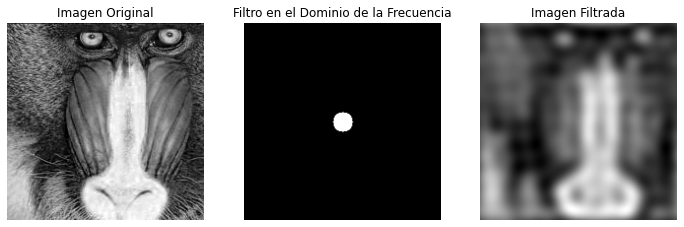

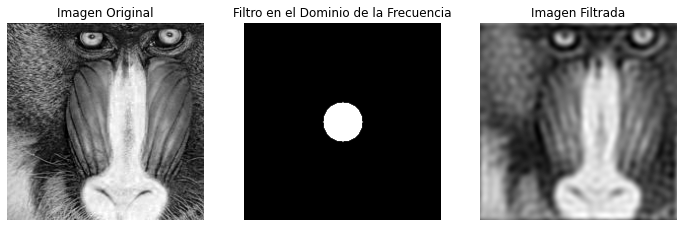

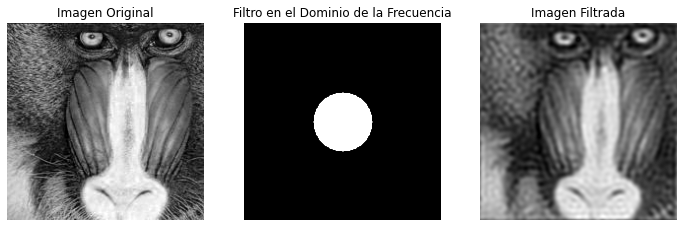

In [30]:
kernel_10 = low_pass_filter(r_1, kernel_size=10)
filtered_image_10 = filter_fourier(r_1, kernel_10)

plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(r_1, cmap='gray'), plt.title('Imagen Original')
plt.axis('off')
plt.subplot(132), plt.imshow(kernel_10, cmap='gray'), plt.title('Filtro en el Dominio de la Frecuencia')
plt.axis('off')
plt.subplot(133), plt.imshow(filtered_image_10, cmap='gray'), plt.title('Imagen Filtrada')
plt.axis('off')
plt.show()

kernel_20 = low_pass_filter(r_1, kernel_size=20)
filtered_image_20 = filter_fourier(r_1, kernel_20)

plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(r_1, cmap='gray'), plt.title('Imagen Original')
plt.axis('off')
plt.subplot(132), plt.imshow(kernel_20, cmap='gray'), plt.title('Filtro en el Dominio de la Frecuencia')
plt.axis('off')
plt.subplot(133), plt.imshow(filtered_image_20, cmap='gray'), plt.title('Imagen Filtrada')
plt.axis('off')
plt.show()

kernel_30 = low_pass_filter(r_1, kernel_size=30)
filtered_image_30 = filter_fourier(r_1, kernel_30)

plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(r_1, cmap='gray'), plt.title('Imagen Original')
plt.axis('off')
plt.subplot(132), plt.imshow(kernel_30, cmap='gray'), plt.title('Filtro en el Dominio de la Frecuencia')
plt.axis('off')
plt.subplot(133), plt.imshow(filtered_image_30, cmap='gray'), plt.title('Imagen Filtrada')
plt.axis('off')
plt.show()

In [31]:
def high_pass_filter(image, kernel_size):
    """ Función que define un filtro paso bajo. 
        El diseño del filtro consiste en crear una matrix
        con un circulo negro en el centro, el radio del 
        círculo es determinado por kernel_size. 
        El fondo es blanco.
        El rango de los valores del filtro debe ser 
        entre 0 y 255. Se pueden usar funciones de cv2.
    """
    # YOUR CODE HERE
    matrix = np.ones((image.shape[0], image.shape[1]), dtype=np.uint8) * 255
    centro = (image.shape[0] // 2, image.shape[1] // 2)
    filtro = cv2.circle(matrix, centro, kernel_size, 0, -1)
    return filtro
    # raise NotImplementedError()

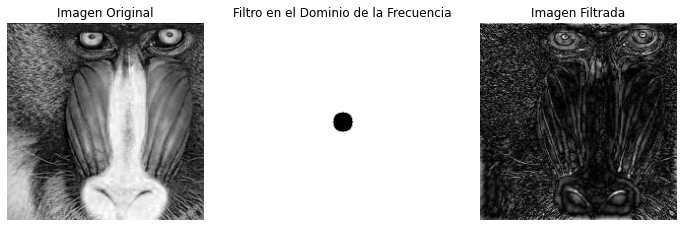

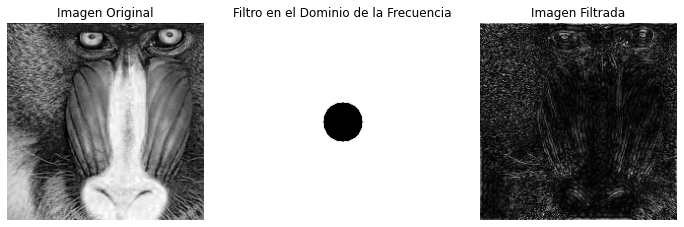

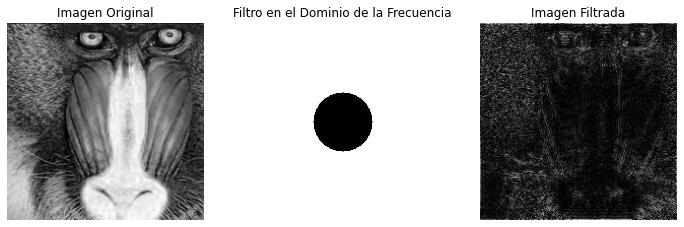

In [32]:
kernel_10 = high_pass_filter(r_1, kernel_size=10)
filtered_image_10 = filter_fourier(r_1, kernel_10)

plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(r_1, cmap='gray'), plt.title('Imagen Original')
plt.axis('off')
plt.subplot(132), plt.imshow(kernel_10, cmap='gray'), plt.title('Filtro en el Dominio de la Frecuencia')
plt.axis('off')
plt.subplot(133), plt.imshow(filtered_image_10, cmap='gray'), plt.title('Imagen Filtrada')
plt.axis('off')
plt.show()

kernel_20 = high_pass_filter(r_1, kernel_size=20)
filtered_image_20 = filter_fourier(r_1, kernel_20)

plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(r_1, cmap='gray'), plt.title('Imagen Original')
plt.axis('off')
plt.subplot(132), plt.imshow(kernel_20, cmap='gray'), plt.title('Filtro en el Dominio de la Frecuencia')
plt.axis('off')
plt.subplot(133), plt.imshow(filtered_image_20, cmap='gray'), plt.title('Imagen Filtrada')
plt.axis('off')
plt.show()

kernel_30 = high_pass_filter(r_1, kernel_size=30)
filtered_image_30 = filter_fourier(r_1, kernel_30)

plt.figure(figsize=(12, 6))
plt.subplot(131), plt.imshow(r_1, cmap='gray'), plt.title('Imagen Original')
plt.axis('off')
plt.subplot(132), plt.imshow(kernel_30, cmap='gray'), plt.title('Filtro en el Dominio de la Frecuencia')
plt.axis('off')
plt.subplot(133), plt.imshow(filtered_image_30, cmap='gray'), plt.title('Imagen Filtrada')
plt.axis('off')
plt.show()